Add imports

In [130]:
from tensorflow.keras import layers, models, Model
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

CoLab import code

In [2]:
# Load the dataset
from google.colab import files
uploaded = files.upload()
#file_path = pd.read_csv(uploaded)

Saving Project3database.csv to Project3database.csv


In [3]:
#read data
df = pd.read_csv('Project3database.csv')

Unused code - no Keras import

In [4]:
# Import the data
#path = 'Project3database.csv'
#df = pd.read_csv(path)
#df.head()

Exploring the data

In [5]:
#Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 83 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      720 non-null    int64  
 1   Tm        720 non-null    object 
 2   #Bat      720 non-null    int64  
 3   BatAge    720 non-null    float64
 4   R/G       720 non-null    float64
 5   G         720 non-null    int64  
 6   PA        720 non-null    int64  
 7   AB        720 non-null    int64  
 8   RS        720 non-null    int64  
 9   H         720 non-null    int64  
 10  2B        720 non-null    int64  
 11  3B        720 non-null    int64  
 12  HR        720 non-null    int64  
 13  RBI       720 non-null    int64  
 14  SB        720 non-null    int64  
 15  CS        720 non-null    int64  
 16  BB        720 non-null    int64  
 17  SO        720 non-null    int64  
 18  BA        720 non-null    float64
 19  OBP       720 non-null    float64
 20  SLG       720 non-null    float6

In [6]:
#Drop columns that do not have complete data
clean_df = df.drop(['Tm','Rdrs/yr','Rgood','Rdrs'], axis=1)
clean_df

,Year,#Bat,BatAge,R/G,G,PA,AB,RS,H,2B,...,Ch,PO,A,E,DP,Fld%,Rtot,Rtot/yr,Playoff,Champion
0,2023,54,27.4,4.60,162,6124,5436,746,1359,274,...,5761,4306,1399,56,134,0.990,43,4,1,0
1,2023,53,27.9,5.85,162,6249,5597,947,1543,293,...,5741,4320,1339,82,133,0.986,21,2,1,0
2,2023,50,27.2,4.98,162,6123,5495,807,1399,309,...,5876,4361,1444,71,140,0.988,37,3,1,0
3,2023,56,28.6,4.77,162,6174,5562,772,1437,339,...,5821,4290,1429,102,137,0.982,-17,-2,0,0
4,2023,48,28.4,5.06,162,6220,5504,819,1399,269,...,5888,4306,1490,92,137,0.984,9,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,2000,36,29.9,5.71,162,6418,5519,925,1535,304,...,6070,4333,1644,93,173,0.985,6,1,1,0
716,2000,46,29.6,5.48,162,6369,5478,887,1481,259,...,5936,4301,1524,111,148,0.981,43,4,1,0
717,2000,51,30.1,4.55,161,6206,5505,733,1414,253,...,6226,4294,1814,118,169,0.981,10,1,0,0
718,2000,42,29.5,5.23,162,6364,5648,848,1601,330,...,6016,4287,1594,135,162,0.978,-62,-6,0,0


In [7]:
#Drop null values
clean_df.dropna()

,Year,#Bat,BatAge,R/G,G,PA,AB,RS,H,2B,...,Ch,PO,A,E,DP,Fld%,Rtot,Rtot/yr,Playoff,Champion
0,2023,54,27.4,4.60,162,6124,5436,746,1359,274,...,5761,4306,1399,56,134,0.990,43,4,1,0
1,2023,53,27.9,5.85,162,6249,5597,947,1543,293,...,5741,4320,1339,82,133,0.986,21,2,1,0
2,2023,50,27.2,4.98,162,6123,5495,807,1399,309,...,5876,4361,1444,71,140,0.988,37,3,1,0
3,2023,56,28.6,4.77,162,6174,5562,772,1437,339,...,5821,4290,1429,102,137,0.982,-17,-2,0,0
4,2023,48,28.4,5.06,162,6220,5504,819,1399,269,...,5888,4306,1490,92,137,0.984,9,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,2000,36,29.9,5.71,162,6418,5519,925,1535,304,...,6070,4333,1644,93,173,0.985,6,1,1,0
716,2000,46,29.6,5.48,162,6369,5478,887,1481,259,...,5936,4301,1524,111,148,0.981,43,4,1,0
717,2000,51,30.1,4.55,161,6206,5505,733,1414,253,...,6226,4294,1814,118,169,0.981,10,1,0,0
718,2000,42,29.5,5.23,162,6364,5648,848,1601,330,...,6016,4287,1594,135,162,0.978,-62,-6,0,0


In [8]:
#Describe the data
# display all columns
pd.set_option('display.max_columns', None)
print(clean_df.describe())

              Year        #Bat      BatAge         R/G           G  \
count   720.000000  720.000000  720.000000  720.000000  720.000000   
mean   2011.500000   47.930556   28.660278    4.564194  157.708333   
std       6.926999    6.065535    1.307156    0.510573   20.417913   
min    2000.000000   34.000000   25.400000    3.170000   58.000000   
25%    2005.750000   44.000000   27.800000    4.220000  162.000000   
50%    2011.500000   47.000000   28.600000    4.540000  162.000000   
75%    2017.250000   51.000000   29.500000    4.900000  162.000000   
max    2023.000000   69.000000   33.500000    6.040000  163.000000   

                PA           AB          RS            H          2B  \
count   720.000000   720.000000  720.000000   720.000000  720.000000   
mean   6029.109722  5378.838889  719.450000  1384.966667  276.601389   
std     804.285879   716.705082  122.748055   207.974680   47.398623   
min    2011.000000  1752.000000  219.000000   390.000000   73.000000   
25%    60

In [9]:
#Get mean value of dataset for baseline
mean_df = clean_df.mean().to_frame().T
mean_df

,Year,#Bat,BatAge,R/G,G,PA,AB,RS,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB,#P,PAge,RA/G,W,L,W-L%,ERA,GS,GF,CG,tSho,cSho,SV,IP,H.1,RA,ER,HR.1,BB.1,IBB.1,SO.1,HBP.1,BK,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB.1,#Fld,RA/G.1,DefEff,GS.1,CG.1,Inn,Ch,PO,A,E,DP,Fld%,Rtot,Rtot/yr,Playoff,Champion
0,2011.5,47.930556,28.660278,4.564194,157.708333,6029.109722,5378.838889,719.45,1384.966667,276.601389,27.866667,171.402778,685.690278,89.294444,34.209722,508.033333,1165.368056,0.25699,0.325478,0.414703,0.740171,97.177778,2231.509722,119.925,57.4125,41.768056,41.959722,34.826389,1097.1875,25.704167,28.605278,4.564153,78.845833,78.845833,0.499996,4.248556,157.708333,153.638889,4.069444,9.272222,1.697222,39.686111,1404.852083,1384.966667,719.45,662.002778,171.402778,508.033333,34.826389,1165.368056,57.4125,4.9875,52.956944,6029.102778,101.805556,4.255194,1.347136,8.860278,1.104167,3.263472,7.507778,2.346778,1095.141667,47.583333,4.564153,0.691093,1419.375,1077.15,12645.753056,5855.290278,4215.283333,1544.1875,95.819444,141.241667,0.983635,1.076389,0.119444,0.3125,0.033333


In [10]:
#Get a dataframe for teams that made the playoffs for comparison to leverage statistics with the most deviation
df_playoffs = clean_df[clean_df['Playoff'] == 1]
df_playoffs

,Year,#Bat,BatAge,R/G,G,PA,AB,RS,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB,#P,PAge,RA/G,W,L,W-L%,ERA,GS,GF,CG,tSho,cSho,SV,IP,H.1,RA,ER,HR.1,BB.1,IBB.1,SO.1,HBP.1,BK,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB.1,#Fld,RA/G.1,DefEff,GS.1,CG.1,Inn,Ch,PO,A,E,DP,Fld%,Rtot,Rtot/yr,Playoff,Champion
0,2023,54,27.4,4.60,162,6124,5436,746,1359,274,44,166,706,166,26,540,1247,0.250,0.322,0.408,0.730,99,2219,121,58,36,50,11,1091,34,28.5,4.70,84,78,0.519,4.48,162,161,1,9,1,44,1435.1,1375,761,714,197,525,13,1351,48,8,40,6100,97,4.35,1.324,8.6,1.2,3.3,8.5,2.57,1050,53,4.70,0.695,1458,1071,12918.0,5761,4306,1399,56,134,0.990,43,4,1,0
1,2023,53,27.9,5.85,162,6249,5597,947,1543,293,23,307,916,132,27,538,1289,0.276,0.344,0.501,0.845,125,2803,128,67,2,43,20,1062,33,29.9,4.42,104,58,0.642,4.14,162,161,1,15,1,52,1440.0,1341,716,662,187,534,14,1516,70,8,56,6135,107,4.10,1.302,8.4,1.2,3.3,9.5,2.84,1112,51,4.42,0.685,1458,1210,12960.0,5741,4320,1339,82,133,0.986,21,2,1,0
2,2023,50,27.2,4.98,162,6123,5495,807,1399,309,28,183,780,114,24,512,1370,0.255,0.321,0.421,0.742,107,2313,114,45,21,47,14,1041,31,28.4,4.19,101,61,0.623,3.89,162,162,0,12,0,49,1453.2,1334,678,629,177,473,16,1431,63,7,64,6098,105,3.98,1.243,8.3,1.1,2.9,8.9,3.03,1080,50,4.19,0.696,1458,991,13083.0,5876,4361,1444,71,140,0.988,37,3,1,0
10,2023,41,28.8,5.10,162,6253,5567,827,1441,280,22,222,799,107,32,550,1241,0.259,0.331,0.437,0.768,111,2431,124,72,14,40,17,1134,24,29.2,4.31,90,72,0.556,3.94,162,160,2,7,2,42,1445.1,1312,698,632,201,537,6,1460,75,5,37,6110,107,4.31,1.279,8.2,1.3,3.3,9.1,2.72,1091,41,4.31,0.697,1458,1164,13008.0,5763,4336,1346,81,144,0.986,33,3,1,0
13,2023,58,30.9,5.59,162,6333,5524,906,1422,303,20,249,877,105,25,644,1359,0.257,0.340,0.455,0.795,114,2512,98,85,5,69,29,1163,39,28.1,4.31,100,62,0.617,4.06,162,162,0,15,0,44,1446.1,1284,699,652,200,454,20,1388,73,4,49,6018,108,4.23,1.202,8.0,1.2,2.8,8.6,3.06,1000,58,4.31,0.709,1458,985,13017.0,5821,4339,1406,76,139,0.987,42,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,2000,46,31.4,5.41,161,6311,5556,871,1541,294,25,205,833,99,48,631,1007,0.277,0.354,0.450,0.804,103,2500,134,57,16,50,42,1189,22,32.0,5.06,87,74,0.540,4.76,161,152,9,6,2,40,1424.1,1458,814,753,177,577,23,1040,52,6,49,6256,102,4.61,1.429,9.2,1.1,3.6,6.6,1.80,1169,46,5.06,0.693,1449,1068,12819.0,5869,4273,1487,109,132,0.981,-22,-2,1,0
710,2000,44,27.3,5.88,161,6432,5560,947,1501,281,23,239,908,40,15,750,1159,0.270,0.360,0.458,0.817,109,2545,147,52,26,44,32,1210,21,29.5,5.05,91,70,0.565,4.58,161,154,7,11,4,43,1435.1,1535,813,730,158,615,57,963,48,1,46,6355,103,4.61,1.498,9.6,1.0,3.9,6.0,1.57,1236,43,5.05,0.680,1449,1035,12918.0,6166,4306,1726,134,164,0.978,-46,-4,1,0
714,2000,37,31.3,5.60,162,6444,5497,907,1481,300,26,198,869,122,56,775,1073,0.269,0.361,0.442,0.803,108,2427,129,48,63,61,34,1247,16,29.3,4.81,91,71,0.562,4.49,162,158,4,10,4,44,1441.2,1442,780,720,167,634,37,998,38,6,43,6269,101,4.65,1.440,9.0,1.0,4.0,6.2,1.57,1164,37,4.81,0.698,1458,1047,12975.0,6053,4325,1629,99,176,0.984,29,3,1,0
715,2000,36,29.9,5.71,162,6418,5519,925,1535,304,44,226,889,79,39,709,1032,0.278,0.362,0.472,0.834,115,2605,131,51,73,66,60,1213,17,28.5,4.61,97,65,0.599,4.21,162,153,9,15,4,47,1444.1,1452,747,675,151,623,26,1076,41,4,43,6270,102,4.38,1.437,9.0,0.9,3.9,6.7,1.73,1190,36,4.61,0.689,1458,975,12999.0,6070,4333,1644,93,173,0.985,6,1,1,0


In [11]:
#Describe df_playoffs
df_playoffs.describe()

,Year,#Bat,BatAge,R/G,G,PA,AB,RS,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB,#P,PAge,RA/G,W,L,W-L%,ERA,GS,GF,CG,tSho,cSho,SV,IP,H.1,RA,ER,HR.1,BB.1,IBB.1,SO.1,HBP.1,BK,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB.1,#Fld,RA/G.1,DefEff,GS.1,CG.1,Inn,Ch,PO,A,E,DP,Fld%,Rtot,Rtot/yr,Playoff,Champion
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.00000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.0,225.000000
mean,2012.511111,46.400000,28.946222,4.872444,154.733333,5959.995556,5284.742222,754.711111,1383.182222,277.617778,26.444444,184.600000,720.328889,88.026667,31.520000,533.893333,1140.968889,0.260640,0.333173,0.428520,0.761707,103.075556,2267.488889,118.364444,59.151111,37.608889,43.382222,36.595556,1092.857778,24.915556,29.148000,4.150489,89.977778,64.728889,0.581080,3.847644,154.733333,150.444444,4.288889,11.182222,1.951111,43.520000,1383.939111,1298.697778,641.955556,590.791111,157.697778,465.284444,29.084444,1210.164444,54.008889,4.648889,49.36000,5839.995556,111.315556,3.985911,1.273484,8.419111,1.035111,3.040889,7.935111,2.652311,1049.208889,46.031111,4.150489,0.697307,1392.600000,1038.102222,12457.626667,5733.204444,4152.542222,1492.831111,87.831111,133.804444,0.984671,16.755556,1.666667,1.0,0.106667
std,6.977714,5.652907,1.330010,0.470047,26.306572,1043.777260,927.888316,148.945553,265.933728,57.423051,10.100291,46.033567,143.060921,34.082741,12.550996,109.105647,235.334060,0.013633,0.012825,0.025023,0.034999,7.830719,426.937277,27.149233,16.325766,24.231729,12.229416,17.482414,199.679000,5.306413,1.392232,0.406817,16.380913,12.069084,0.036514,0.398187,26.306572,25.614550,3.567101,4.151984,1.737792,9.871532,240.866420,249.884593,125.276900,117.153234,33.748112,93.651515,14.963556,257.456523,14.239969,2.580198,14.98181,1020.089332,9.344258,0.346931,0.080792,0.583737,0.163835,0.381631,1.180596,0.521738,190.895577,5.710572,0.406817,0.011470,236.759145,187.464743,2167.895372,1021.501168,722.631791,305.505842,21.456308,31.125279,0.002507,34.579073,3.286879,0.0,0.309377
min,2000.000000,34.000000,25.900000,3.820000,58.000000,2011.000000,1752.000000,240.000000,390.000000,73.000000,3.000000,51.000000,231.000000,14.000000,3.000000,179.000000,440.000000,0.212000,0.309000,0.369000,0.686000,83.000000,650.000000,37.000000,12.000000,0.000000,7.000000,1.000000,365.000000,15.000000,26.300000,3.170000,29.000000,17.000000,0.483000,2.800000,58.000000,56.000000,0.000000,0.000000,0.000000,9.000000,473.000000,376.000000,209.000000,181.000000,62.000000,145.000000,0.000000,451.000000,14.000000,0.000000,11.00000,1989.000000,94.000000,3.170000,1.048000,6.900000,0.600000,2.200000,5.800000,1.570000,348.000000,34.000000,3.170000,0.659000,522.000000,355.000000,4257.000000,1941.000000,1419.000000,442.000000,20.000000,33.000000,0.976000,-87.000000,-8.000000,1.0,0.000000
25%,2007.000000,42.000000,28.000000,4.510000,162.000000,6152.000000,5484.000000,724.000000,1384.000000,271.000000,20.000000,161.000000,688.000000,63.000000,23.000000,500.000000,1024.000000,0.253000,0.323000,0.412000,0.737000,98.000000,2241.000000,108.000000,49.000000,19.000000,38.000000,24.000000,1095.000000,21.000000,28.100000,3.890000,90.000000,64.000000,0.556000,3.580000,162.000000,154.000000,1.000000,8.000000,1.00

In [12]:
#Get mean values for playoff dataframe
mean_playoff_df = df_playoffs.mean().to_frame().T
mean_playoff_df.head()

,Year,#Bat,BatAge,R/G,G,PA,AB,RS,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB,#P,PAge,RA/G,W,L,W-L%,ERA,GS,GF,CG,tSho,cSho,SV,IP,H.1,RA,ER,HR.1,BB.1,IBB.1,SO.1,HBP.1,BK,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB.1,#Fld,RA/G.1,DefEff,GS.1,CG.1,Inn,Ch,PO,A,E,DP,Fld%,Rtot,Rtot/yr,Playoff,Champion
0,2012.511111,46.4,28.946222,4.872444,154.733333,5959.995556,5284.742222,754.711111,1383.182222,277.617778,26.444444,184.6,720.328889,88.026667,31.52,533.893333,1140.968889,0.26064,0.333173,0.42852,0.761707,103.075556,2267.488889,118.364444,59.151111,37.608889,43.382222,36.595556,1092.857778,24.915556,29.148,4.150489,89.977778,64.728889,0.58108,3.847644,154.733333,150.444444,4.288889,11.182222,1.951111,43.52,1383.939111,1298.697778,641.955556,590.791111,157.697778,465.284444,29.084444,1210.164444,54.008889,4.648889,49.36,5839.995556,111.315556,3.985911,1.273484,8.419111,1.035111,3.040889,7.935111,2.652311,1049.208889,46.031111,4.150489,0.697307,1392.6,1038.102222,12457.626667,5733.204444,4152.542222,1492.831111,87.831111,133.804444,0.984671,16.755556,1.666667,1.0,0.106667


In [13]:
#Get a dataframe for teams that made the champion for comparison to leverage statistics with the most deviation
df_champion = clean_df[clean_df['Champion'] == 1]
df_champion

,Year,#Bat,BatAge,R/G,G,PA,AB,RS,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB,#P,PAge,RA/G,W,L,W-L%,ERA,GS,GF,CG,tSho,cSho,SV,IP,H.1,RA,ER,HR.1,BB.1,IBB.1,SO.1,HBP.1,BK,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB.1,#Fld,RA/G.1,DefEff,GS.1,CG.1,Inn,Ch,PO,A,E,DP,Fld%,Rtot,Rtot/yr,Playoff,Champion
27,2023,48,28.3,5.44,162,6306,5595,881,1470,326,18,233,845,79,19,599,1416,0.263,0.337,0.452,0.790,116,2531,103,53,10,47,17,1164,31,30.4,4.42,90,72,0.556,4.28,162,159,3,13,1,30,1436.1,1330,716,683,198,491,19,1351,59,4,46,6025,100,4.31,1.268,8.3,1.2,3.1,8.5,2.75,1016,48,4.42,0.703,1458,1109,12927.0,5789,4309,1423,57,143,0.990,36,3,1,1
40,2022,45,29.3,4.55,162,6054,5409,737,1341,284,13,214,715,83,22,528,1179,0.248,0.319,0.424,0.743,111,2293,118,60,9,42,18,1068,22,29.4,3.20,106,56,0.654,2.90,162,159,3,18,1,53,1445.1,1121,518,465,134,458,6,1524,60,6,56,5856,132,3.28,1.092,7.0,0.8,2.9,9.5,3.33,1017,44,3.20,0.719,1458,1140,13008.0,5698,4336,1290,72,122,0.987,45,4,1,1
61,2021,56,28.2,4.91,161,6056,5363,790,1307,269,20,239,762,59,19,549,1453,0.244,0.319,0.435,0.754,98,2333,81,67,32,43,36,1072,30,29.5,4.07,88,73,0.547,3.88,161,159,2,18,2,40,1410.2,1237,656,608,183,516,34,1417,66,8,73,5944,112,4.09,1.243,7.9,1.2,3.3,9.0,2.75,1074,55,4.07,0.708,1449,1126,12696.0,5786,4232,1483,71,104,0.988,60,6,1,1
103,2020,38,28.0,5.82,60,2316,2042,349,523,97,6,118,327,29,8,228,471,0.256,0.338,0.483,0.821,119,986,46,30,3,12,7,401,21,27.6,3.55,43,17,0.717,3.02,60,60,0,5,0,15,538.2,424,213,181,66,145,4,517,21,0,24,2172,146,3.79,1.056,7.1,1.1,2.4,8.6,3.57,353,38,3.55,0.729,540,404,4848.0,2200,1616,544,40,46,0.982,35,9,1,1
149,2019,50,28.8,5.39,162,6267,5512,873,1460,298,27,231,824,116,29,584,1308,0.265,0.342,0.454,0.796,104,2505,117,81,48,42,33,1114,31,30.8,4.47,93,69,0.574,4.27,162,161,1,13,1,40,1439.1,1340,724,683,202,517,41,1511,61,5,53,6134,106,4.14,1.290,8.4,1.3,3.2,9.4,2.92,1092,50,4.47,0.689,1458,1171,12954.0,5779,4318,1374,87,111,0.985,6,1,1,1
153,2018,44,27.7,5.41,162,6302,5623,876,1509,355,31,208,829,125,31,569,1253,0.268,0.339,0.453,0.792,112,2550,130,55,7,48,38,1124,23,28.9,3.99,108,54,0.667,3.75,162,160,2,14,0,46,1458.2,1305,647,608,176,512,8,1558,84,3,51,6166,118,3.82,1.246,8.1,1.1,3.2,9.6,3.04,1143,43,3.99,0.693,1458,1127,13128.0,5819,4376,1366,77,106,0.987,29,3,1,1
190,2017,46,28.8,5.53,162,6271,5611,896,1581,346,20,238,854,98,42,509,1087,0.282,0.346,0.478,0.823,123,2681,139,70,11,61,27,1094,27,28.5,4.32,101,61,0.623,4.12,162,161,1,9,0,45,1446.0,1314,700,662,192,522,17,1593,70,4,86,6111,99,3.91,1.270,8.2,1.2,3.2,9.9,3.05,1073,46,4.32,0.682,1458,1044,13014.0,5963,4338,1526,99,153,0.983,-15,-1,1,1
214,2016,45,27.4,4.99,162,6335,5503,808,1409,293,30,199,767,66,34,656,1339,0.256,0.343,0.429,0.772,104,2359,107,96,42,37,45,1217,26,29.9,3.43,103,58,0.640,3.15,162,157,5,15,2,38,1459.2,1125,556,511,163,495,24,1441,63,0,80,5933,133,3.77,1.110,6.9,1.0,3.1,8.9,2.91,998,45,3.43,0.728,1458,1017,13137.0,6115,4379,1635,101,116,0.983,95,9,1,1
251,2015,45,29.1,4.47,162,6116,5575,724,1497,300,42,139,689,104,34,383,973,0.269,0.322,0.412,0.734,98,2298,133,77,34,47,28,1079,24,30.0,3.96,95,67,0.586,3.73,162,160,2,8,1,56,1452.0,1372,641,601,155,489,10,1160,52,2,62,6112,112,4.04,1.282,8.5,1.0,3.0,7.2,2.37,1115,45,3.96,0.701,1458,1172,13068.0,6055,4356,1611,88,138,0.985,17,2,1,1
294,2014,46,28.6,4.10,162,6087,5523,665,1407,257,42,132,636,56,27,427,1245,0.255,0.311,0.388,0.699,100,2144,113,43,45,49,37,1095,21,31.7,3.79,88,74,0.543,3.50,162,154,8,12,3,46,1449.0,1305,614,564,133,389,35,1211,57,6,49,5947,99,3.58,1.169,8.1,0.8,2.4,7.5,3.11,986,46,3.79,0.703,1458,1054,13041.0,6146,4347,1699,100,155,0.984,46,4,1,1


In [14]:
#Get mean values for champion dataframe
mean_champion_df = df_champion.mean().to_frame().T
mean_champion_df.head()

,Year,#Bat,BatAge,R/G,G,PA,AB,RS,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB,#P,PAge,RA/G,W,L,W-L%,ERA,GS,GF,CG,tSho,cSho,SV,IP,H.1,RA,ER,HR.1,BB.1,IBB.1,SO.1,HBP.1,BK,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB.1,#Fld,RA/G.1,DefEff,GS.1,CG.1,Inn,Ch,PO,A,E,DP,Fld%,Rtot,Rtot/yr,Playoff,Champion
0,2011.5,44.666667,29.116667,5.018333,157.666667,6095.875,5406.791667,787.833333,1442.041667,297.625,28.541667,187.541667,751.125,90.791667,33.708333,538.625,1098.5,0.26625,0.337083,0.437417,0.774458,105.541667,2359.375,120.125,60.583333,43.083333,45.375,41.333333,1118.166667,23.083333,29.783333,4.103333,93.125,64.5,0.594167,3.802917,157.666667,152.875,4.791667,11.833333,2.125,43.458333,1410.85,1305.291667,649.208333,599.291667,159.875,485.25,29.375,1227.791667,58.75,4.416667,52.375,5950.833333,113.041667,3.998333,1.263458,8.295833,1.016667,3.083333,7.845833,2.575833,1070.833333,44.25,4.103333,0.70175,1419.0,1048.75,12699.75,5843.791667,4233.25,1522.625,87.916667,133.833333,0.984875,28.791667,3.041667,1.0,1.0


In [15]:
#Describe df_playoffs
df_champion.describe()

,Year,#Bat,BatAge,R/G,G,PA,AB,RS,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB,#P,PAge,RA/G,W,L,W-L%,ERA,GS,GF,CG,tSho,cSho,SV,IP,H.1,RA,ER,HR.1,BB.1,IBB.1,SO.1,HBP.1,BK,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB.1,#Fld,RA/G.1,DefEff,GS.1,CG.1,Inn,Ch,PO,A,E,DP,Fld%,Rtot,Rtot/yr,Playoff,Champion
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.0,24.0
mean,2011.500000,44.666667,29.116667,5.018333,157.666667,6095.875000,5406.791667,787.833333,1442.041667,297.625000,28.541667,187.541667,751.125000,90.791667,33.708333,538.625000,1098.50000,0.266250,0.337083,0.437417,0.774458,105.541667,2359.375000,120.125000,60.583333,43.083333,45.375000,41.333333,1118.166667,23.083333,29.783333,4.103333,93.125000,64.500000,0.594167,3.802917,157.666667,152.875000,4.791667,11.833333,2.125000,43.458333,1410.850000,1305.291667,649.208333,599.291667,159.875000,485.250000,29.375000,1227.791667,58.75000,4.416667,52.375000,5950.833333,113.041667,3.998333,1.263458,8.295833,1.016667,3.083333,7.845833,2.575833,1070.833333,44.250000,4.103333,0.701750,1419.00000,1048.750000,12699.750000,5843.791667,4233.250000,1522.625000,87.916667,133.833333,0.984875,28.791667,3.041667,1.0,1.0
std,7.071068,4.280051,1.112641,0.485903,20.804821,814.294537,721.434379,118.978137,211.521708,54.073069,11.033464,40.459297,115.208058,32.590982,14.845521,105.339126,209.96977,0.011019,0.013784,0.024649,0.035605,8.361294,327.971607,24.931755,15.980740,26.552518,10.549315,16.869491,166.199112,4.009951,1.370391,0.399093,12.266294,11.743638,0.045298,0.409936,20.804821,19.965868,2.903958,3.331884,1.454005,9.912571,186.301611,207.457377,111.429829,106.443894,30.137817,84.736548,15.950501,233.958372,14.67103,2.827146,15.791612,812.005337,12.719308,0.308357,0.083507,0.607546,0.152277,0.318511,1.131363,0.449463,163.867037,4.275817,0.399093,0.012241,187.24339,153.819841,1676.245864,790.842642,558.748621,244.166873,18.971183,27.210399,0.002525,31.460091,3.127427,0.0,0.0
min,2000.000000,38.000000,27.400000,4.100000,60.000000,2316.000000,2042.000000,349.000000,523.000000,97.000000,6.000000,103.000000,327.000000,29.000000,8.000000,228.000000,471.00000,0.244000,0.311000,0.388000,0.699000,94.000000,986.000000,46.000000,29.000000,3.000000,12.000000,7.000000,401.000000,17.000000,26.300000,3.200000,43.000000,17.000000,0.516000,2.900000,60.000000,60.000000,0.000000,5.000000,0.000000,15.000000,538.200000,424.000000,213.000000,181.000000,66.000000,145.000000,4.000000,517.000000,21.00000,0.000000,24.000000,2172.000000,96.000000,3.280000,1.056000,6.900000,0.800000,2.400000,6.100000,1.920000,353.000000,37.000000,3.200000,0.682000,540.00000,404.000000,4848.000000,2200.000000,1616.000000,544.000000,40.000000,46.000000,0.980000,-15.000000,-1.000000,1.0,1.0
25%,2005.750000,40.750000,28.275000,4.622500,162.000000,6145.250000,5499.750000,740.000000,1410.500000,284.000000,20.750000,160.750000,712.000000,64.250000,24.750000,486.000000,996.00000,0.256750,0.325750,0.424750,0.752250,98.000000,2307.000000,107.750000,52.250000,21.000000,40.000000,31.750000,1093.500000,20.000000,29.200000,3.975000,90.750000,62.500000,0.566500,3.662500,162.000000,155.000000,2.750000,9.000000,1.000000,37.500000,1443.600000,1305.000000,643.250000,592.750000,140.500000,460.500000,18.500000,1123.500000,51.

In [16]:
#Combie both mean dataframes and create a column to display the differnces between the two
mean_combined = pd.concat([mean_df, mean_playoff_df], ignore_index=True)

# display all columns
pd.set_option('display.max_columns', None)
print(mean_combined)


          Year       #Bat     BatAge       R/G           G           PA  \
0  2011.500000  47.930556  28.660278  4.564194  157.708333  6029.109722   
1  2012.511111  46.400000  28.946222  4.872444  154.733333  5959.995556   

            AB          RS            H          2B         3B          HR  \
0  5378.838889  719.450000  1384.966667  276.601389  27.866667  171.402778   
1  5284.742222  754.711111  1383.182222  277.617778  26.444444  184.600000   

          RBI         SB         CS          BB           SO       BA  \
0  685.690278  89.294444  34.209722  508.033333  1165.368056  0.25699   
1  720.328889  88.026667  31.520000  533.893333  1140.968889  0.26064   

        OBP       SLG       OPS        OPS+           TB         GDP  \
0  0.325478  0.414703  0.740171   97.177778  2231.509722  119.925000   
1  0.333173  0.428520  0.761707  103.075556  2267.488889  118.364444   

         HBP         SH         SF        IBB          LOB         #P  \
0  57.412500  41.768056  41.9

In [17]:
# Calculating the difference between consecutive rows
df_diff = mean_combined.diff()

# Selecting the second row to get the difference between the first and second row
difference = df_diff.iloc[1].to_frame().T
display(difference)

,Year,#Bat,BatAge,R/G,G,PA,AB,RS,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB,#P,PAge,RA/G,W,L,W-L%,ERA,GS,GF,CG,tSho,cSho,SV,IP,H.1,RA,ER,HR.1,BB.1,IBB.1,SO.1,HBP.1,BK,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB.1,#Fld,RA/G.1,DefEff,GS.1,CG.1,Inn,Ch,PO,A,E,DP,Fld%,Rtot,Rtot/yr,Playoff,Champion
1,1.011111,-1.530556,0.285944,0.30825,-2.975,-69.114167,-94.096667,35.261111,-1.784444,1.016389,-1.422222,13.197222,34.638611,-1.267778,-2.689722,25.86,-24.399167,0.00365,0.007696,0.013817,0.021536,5.897778,35.979167,-1.560556,1.738611,-4.159167,1.4225,1.769167,-4.329722,-0.788611,0.542722,-0.413664,11.131944,-14.116944,0.081084,-0.400911,-2.975,-3.194444,0.219444,1.91,0.253889,3.833889,-20.912972,-86.268889,-77.494444,-71.211667,-13.705,-42.748889,-5.741944,44.796389,-3.403611,-0.338611,-3.596944,-189.107222,9.51,-0.269283,-0.073652,-0.441167,-0.069056,-0.222583,0.427333,0.305533,-45.932778,-1.552222,-0.413664,0.006214,-26.775,-39.047778,-188.126389,-122.085833,-62.741111,-51.356389,-7.988333,-7.437222,0.001036,15.679167,1.547222,0.6875,0.073333


In [18]:
#Copy original dataframe
explore_df = clean_df.copy()
explore_SS = explore_df.copy()

In [22]:
#Scaled DataFrame
scaled_df = clean_df.copy()
scaled_df = scaled_df.drop(columns=['Playoff', 'Champion'])
target_df = clean_df[['Playoff', 'Champion']]
scaled_df_data = StandardScaler().fit_transform(scaled_df)
scaled_df_data

array([[ 1.66132477e+00,  1.00134008e+00, -9.64807596e-01, ...,
         2.36651503e+00,  1.20710159e+00,  1.16520651e+00],
       [ 1.66132477e+00,  8.36359562e-01, -5.82031825e-01, ...,
         8.79374885e-01,  5.73658184e-01,  5.64670586e-01],
       [ 1.66132477e+00,  3.41418013e-01, -1.11791790e+00, ...,
         1.62294496e+00,  1.03434430e+00,  8.64938548e-01],
       ...,
       [-1.66132477e+00,  5.06398530e-01,  1.10218157e+00, ...,
        -9.79550298e-01,  2.56936482e-01,  2.64402623e-01],
       [-1.66132477e+00, -9.78426118e-01,  6.42850642e-01, ...,
        -2.09490541e+00, -1.81615102e+00, -1.83747312e+00],
       [-1.66132477e+00, -4.83484569e-01, -4.28921517e-01, ...,
         1.35804812e-01, -2.19945626e-03, -3.58653400e-02]])

In [24]:
#Scaled continued
data_scaled = pd.DataFrame(scaled_df_data, columns=scaled_df.columns)
data_scaled = pd.concat([data_scaled, target_df], axis=1)
data_scaled

,Year,#Bat,BatAge,R/G,G,PA,AB,RS,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB,#P,PAge,RA/G,W,L,W-L%,ERA,GS,GF,CG,tSho,cSho,SV,IP,H.1,RA,ER,HR.1,BB.1,IBB.1,SO.1,HBP.1,BK,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB.1,#Fld,RA/G.1,DefEff,GS.1,CG.1,Inn,Ch,PO,A,E,DP,Fld%,Rtot,Rtot/yr,Playoff,Champion
0,1.661325,1.001340,-0.964808,0.070177,0.210337,0.118063,0.079811,0.216447,-0.124942,-0.054921,1.638594,-0.130544,0.172267,2.375654,-0.687442,0.343627,0.377219,-0.521260,-0.237562,-0.246209,-0.257354,0.212578,-0.036994,0.046959,0.036913,-0.246784,0.777910,-1.444786,-0.039423,1.565825,-0.079104,0.244282,0.329347,-0.054104,0.252576,0.421591,0.210337,0.36754,-0.921494,-0.066359,-0.450316,0.482027,0.162603,-0.047043,0.326987,0.440216,0.734450,0.188692,-1.279879,0.861123,-0.661887,1.138744,-0.889102,0.088157,-0.432315,0.220291,-0.233005,-0.397908,0.489761,0.086194,0.899065,0.446746,-0.275591,0.888545,0.244282,0.331627,0.210337,-0.040310,0.162610,-0.118095,0.162550,-0.581528,-1.922076,-0.270332,2.366515,1.207102,1.165207,1,0
1,1.661325,0.836360,-0.582032,2.520110,0.210337,0.273588,0.304606,1.855086,0.760396,0.346213,-0.494287,3.276352,1.953486,1.322637,-0.603707,0.322128,0.571300,1.417541,1.265227,3.169898,2.652510,3.245702,1.690042,0.352740,0.602390,-1.701461,0.100649,-0.899043,-0.224193,1.377077,0.972837,-0.259217,1.607333,-1.333418,1.887317,-0.197741,0.210337,0.36754,-0.921494,1.396244,-0.450316,1.375934,0.188944,-0.207524,-0.027151,-0.000024,0.447524,0.288785,-1.221240,1.626537,0.885153,1.138744,0.208814,0.131677,0.467301,-0.360611,-0.454569,-0.703665,0.489761,0.086194,1.805178,0.987111,0.102920,0.560467,-0.259217,-0.517187,0.210337,0.870766,0.187696,-0.143144,0.187636,-0.821849,-0.667062,-0.307662,0.879375,0.573658,0.564671,1,0
2,1.661325,0.341418,-1.117918,0.814957,0.210337,0.116819,0.162189,0.713745,0.067523,0.684010,0.013542,0.280217,0.799935,0.765158,-0.854913,0.042640,0.945599,-0.148414,-0.305871,0.231312,0.046284,1.145847,0.240988,-0.258822,-0.779887,-0.888553,0.487655,-1.262871,-0.357992,0.999580,-0.154243,-0.672806,1.415635,-1.141521,1.634796,-0.653133,0.210337,0.41747,-1.221710,0.664942,-1.096189,1.040719,0.259902,-0.240565,-0.326200,-0.279406,0.160599,-0.389618,-1.103962,1.232233,0.392913,0.760737,0.757771,0.085670,0.287377,-0.639444,-1.048762,-0.856543,-0.021294,-0.857675,1.261510,1.367368,-0.092440,0.396428,-0.672806,0.416508,0.210337,-0.564671,0.261163,0.025938,0.261102,-0.401287,-1.198029,-0.046352,1.622945,1.034344,0.864939,1,0
3,1.661325,1.331301,-0.046146,0.403368,0.210337,0.180273,0.255738,0.428410,0.250365,1.317380,-0.900550,0.256054,0.409763,0.703216,-0.687442,-0.236848,0.954841,0.075294,-0.100945,0.341509,0.198103,0.329237,0.379979,-0.084090,0.853713,-1.316399,-0.673365,-1.202233,0.126233,1.377077,1.047976,0.406121,-0.054048,0.329690,-0.252466,0.494454,0.210337,0.41747,-1.221710,-1.041427,-1.096189,0.370289,0.135187,0.146478,0.445032,0.474081,1.050068,-0.122706,-0.810766,1.195122,1.799313,-0.373281,-0.271524,0.172711,-0.072469,0.266763,-0.092010,0.060727,1.000816,-0.385741,1.352121,1.027138,0.133446,1.380663,0.406121,-1.196238,0.210337,-0.118964,0.133940,-0.042947,0.133881,-0.461367,0.298334,-0.158342,-0.607765,-0.520471,-0.636401,0,0
4,1.661325,0.011457,-0.199256,0.971752,0.210337,0.237506,0.174755,0.811575,0.067523,-0.160483,0.216674,0.594328,0.850827,1.570406,-0.017561,0.666114,1.042640,-0.222983,0.308907,0.231312,0.274012,0.562554,0.249859,-1.088799,1.230697,-1.145261,0.971413,-1.444786,0.189947,0.244586,0.747421,-0.187289,0.265448,0.009861,0.159542,-0.307035,0.210337,0.36754,-0.921494,0.908710,-0.450316,-0.523618,0.162603,-0.268885,0.027937,-0.093151,0.217984,0.055236,-1.748991,0.981734,0.463233,0.382731,0.277433,0.069505,0.647224,-0.221195,-0.645920,-0.856543,-0.021294,-0.149774,0.989676,0.666895,-0.135175,0.068350,-0.187289,0.246745,0.210337,0.346406,0.162610,0.040968,0.162550,-0.217040,-0.184364,-0.158342,0.135805,0.228144,0.264403,0,0
...,...,...,...,...,...,...,...,...,...,...,...

<Axes: xlabel='W', ylabel='L'>

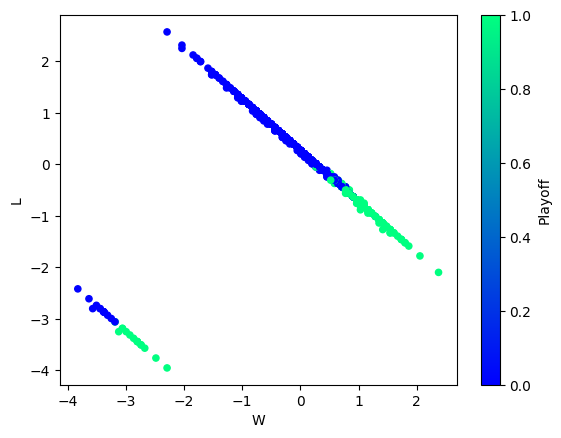

In [28]:
# Plot the data
data_scaled.plot.scatter("W", "L", c="Playoff", colormap="winter")

<Axes: xlabel='W', ylabel='L'>

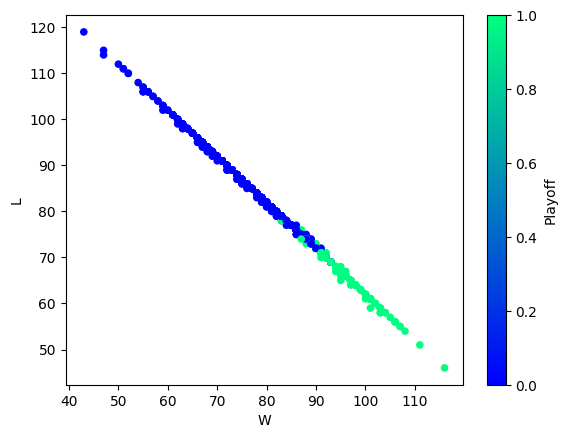

In [30]:
# Plot the data
drop2020_df = clean_df.drop(clean_df[clean_df['Year'] == 2020].index)
drop2020_df.plot.scatter("W", "L", c="Playoff", colormap="winter")


<Axes: xlabel='R/G', ylabel='RA/G'>

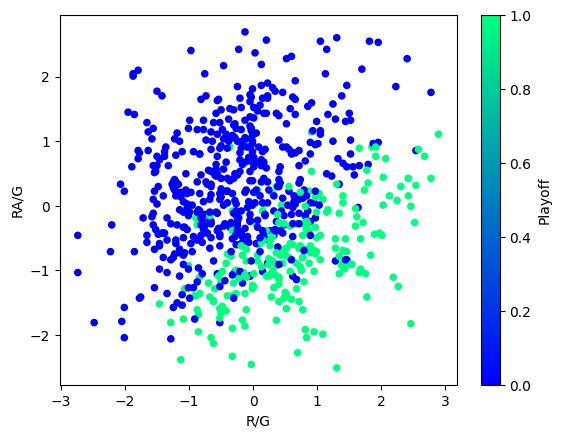

In [29]:
# Plot the data
data_scaled.plot.scatter("R/G", "RA/G", c="Playoff", colormap="winter")

In [31]:
#Write lines to drop columns
explore_SS = explore_SS.drop(columns=['Year'])
explore_SS = explore_SS.drop(columns=['#Bat'])
explore_SS = explore_SS.drop(columns=['BatAge'])
explore_SS = explore_SS.drop('R/G', axis=1)
explore_SS = explore_SS.drop('PA', axis=1)
explore_SS = explore_SS.drop('AB', axis=1)
explore_SS = explore_SS.drop('RS', axis=1)
explore_SS = explore_SS.drop('H', axis=1)
explore_SS = explore_SS.drop('2B', axis=1)
explore_SS = explore_SS.drop('3B', axis=1)
#explore_SS = explore_SS.drop('HR', axis=1)
explore_SS = explore_SS.drop('RBI', axis=1)
explore_SS = explore_SS.drop('CS', axis=1)
explore_SS = explore_SS.drop('BB', axis=1)
explore_SS = explore_SS.drop('BA', axis=1)
#explore_SS = explore_SS.drop('OBP', axis=1)
#explore_SS = explore_SS.drop('SLG', axis=1)
#explore_SS = explore_SS.drop('OPS', axis=1)
#explore_SS = explore_SS.drop('OPS+', axis=1)
explore_SS = explore_SS.drop('TB', axis=1)
explore_SS = explore_SS.drop('HBP', axis=1)
explore_SS = explore_SS.drop('SH', axis=1)
explore_SS = explore_SS.drop('SF', axis=1)
explore_SS = explore_SS.drop('IBB', axis=1)
explore_SS = explore_SS.drop('LOB', axis=1)
explore_SS = explore_SS.drop('#P', axis=1)
explore_SS = explore_SS.drop('RA/G', axis=1)
explore_SS = explore_SS.drop('W', axis=1)
explore_SS = explore_SS.drop('L', axis=1)
explore_SS = explore_SS.drop('W-L%', axis=1)
explore_SS = explore_SS.drop('ERA', axis=1)
explore_SS = explore_SS.drop('GF', axis=1)
explore_SS = explore_SS.drop('CG', axis=1)
explore_SS = explore_SS.drop('tSho', axis=1)
explore_SS = explore_SS.drop('cSho', axis=1)
explore_SS = explore_SS.drop('SV', axis=1)
explore_SS = explore_SS.drop('IP', axis=1)
explore_SS = explore_SS.drop('H.1', axis=1)
explore_SS = explore_SS.drop('RA', axis=1)
explore_SS = explore_SS.drop('ER', axis=1)
explore_SS = explore_SS.drop('HR.1', axis=1)
explore_SS = explore_SS.drop('BB.1', axis=1)
explore_SS = explore_SS.drop('IBB.1', axis=1)
explore_SS = explore_SS.drop('HBP.1', axis=1)
explore_SS = explore_SS.drop('BK', axis=1)
explore_SS = explore_SS.drop('BF', axis=1)
explore_SS = explore_SS.drop('ERA+', axis=1)
explore_SS = explore_SS.drop('FIP', axis=1)
#explore_SS = explore_SS.drop('WHIP', axis=1)
explore_SS = explore_SS.drop('H9', axis=1)
explore_SS = explore_SS.drop('BB9', axis=1)
explore_SS = explore_SS.drop('SO9', axis=1)
explore_SS = explore_SS.drop('SO/W', axis=1)
explore_SS = explore_SS.drop('LOB.1', axis=1)
#explore_SS = explore_SS.drop('#Fld', axis=1)
explore_SS = explore_SS.drop('RA/G.1', axis=1)
#explore_SS = explore_SS.drop('DefEff', axis=1)
explore_SS = explore_SS.drop('CG.1', axis=1)
explore_SS = explore_SS.drop('Inn', axis=1)
explore_SS = explore_SS.drop('Ch', axis=1)
explore_SS = explore_SS.drop('A', axis=1)
#explore_SS = explore_SS.drop('E', axis=1)
explore_SS = explore_SS.drop('DP', axis=1)
explore_SS = explore_SS.drop('Rtot', axis=1)
explore_SS = explore_SS.drop('Rtot/yr', axis=1)
explore_SS = explore_SS.drop('SB', axis=1)
explore_SS = explore_SS.drop('SO', axis=1)
explore_SS = explore_SS.drop('GDP', axis=1)
explore_SS = explore_SS.drop('PAge', axis=1)
explore_SS = explore_SS.drop('GS', axis=1)
explore_SS = explore_SS.drop('SO.1', axis=1)
explore_SS = explore_SS.drop('WP', axis=1)
explore_SS = explore_SS.drop('HR9', axis=1)
explore_SS = explore_SS.drop('GS.1', axis=1)
explore_SS = explore_SS.drop('PO', axis=1)
explore_SS = explore_SS.drop('Fld%', axis=1)
explore_SS = explore_SS.drop('G', axis=1)


In [32]:
#Look at dataframe to Scale
explore_SS

,HR,OBP,SLG,OPS,OPS+,WHIP,#Fld,DefEff,E,Playoff,Champion
0,166,0.322,0.408,0.730,99,1.324,53,0.695,56,1,0
1,307,0.344,0.501,0.845,125,1.302,51,0.685,82,1,0
2,183,0.321,0.421,0.742,107,1.243,50,0.696,71,1,0
3,182,0.324,0.424,0.748,100,1.338,56,0.677,102,0,0
4,196,0.330,0.421,0.751,102,1.283,48,0.694,92,0,0
...,...,...,...,...,...,...,...,...,...,...,...
715,226,0.362,0.472,0.834,115,1.437,36,0.689,93,1,0
716,235,0.356,0.455,0.812,103,1.401,46,0.699,111,1,0
717,162,0.329,0.399,0.728,85,1.457,49,0.684,118,0,0
718,173,0.352,0.446,0.798,100,1.640,41,0.667,135,0,0


In [59]:
#Scale the data
champion = explore_SS['Champion']
playoff = explore_SS['Playoff']
scale_SS = explore_SS.drop(columns=['Champion', 'Playoff'])
explore_SS_scaled = StandardScaler().fit_transform(scale_SS)
explore_SS_scaled = pd.DataFrame(explore_SS_scaled, columns=scale_SS.columns)
explore_SS_scaled

,HR,OBP,SLG,OPS,OPS+,WHIP,#Fld,DefEff,E
0,-0.130544,-0.237562,-0.246209,-0.257354,0.212578,-0.233005,0.888545,0.331627,-1.922076
1,3.276352,1.265227,3.169898,2.652510,3.245702,-0.454569,0.560467,-0.517187,-0.667062
2,0.280217,-0.305871,0.231312,0.046284,1.145847,-1.048762,0.396428,0.416508,-1.198029
3,0.256054,-0.100945,0.341509,0.198103,0.329237,-0.092010,1.380663,-1.196238,0.298334
4,0.594328,0.308907,0.231312,0.274012,0.562554,-0.645920,0.068350,0.246745,-0.184364
...,...,...,...,...,...,...,...,...,...
715,1.319199,2.494782,2.104660,2.374175,2.079116,0.905026,-1.900120,-0.177661,-0.136094
716,1.536660,2.084930,1.480211,1.817506,0.679212,0.542467,-0.259729,0.671152,0.732762
717,-0.227194,0.240598,-0.576800,-0.307961,-1.420643,1.106447,0.232389,-0.602068,1.070651
718,0.038593,1.811696,1.149620,1.463261,0.329237,2.949454,-1.079924,-2.045051,1.891237


Branching

In [61]:
# Split data into X and two separate y variables
X = explore_SS_scaled

y_playoff = explore_SS['Playoff']

y_champion = explore_SS[['Champion']]

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_playoff_train, y_playoff_test, y_champion_train, y_champion_test = train_test_split(X, y_playoff, y_champion)

In [62]:
# Create the shared layers of the model

# Input layer
input_layer = layers.Input(shape=(X.shape[1],), name='input_features')

# Shared hidden layers
shared_layer1 = layers.Dense(64, activation='relu')(input_layer)
shared_layer2 = layers.Dense(32, activation='relu')(shared_layer1)

In [63]:
# Branch for quality prediction
playoff_output = layers.Dense(1, activation='sigmoid', name='playoff_output')(shared_layer2)

# Branch for color prediction
champion_output = layers.Dense(1, activation='sigmoid', name='champion_output')(shared_layer2)

In [64]:
# Create the model
model = Model(inputs=input_layer, outputs=[playoff_output, champion_output])

# Compile the model
model.compile(optimizer='adam',
              loss={'playoff_output': 'binary_crossentropy', 'champion_output': 'binary_crossentropy'},
              metrics={'playoff_output': 'accuracy', 'champion_output': 'accuracy'})

# Display the model summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_features (InputLayer  [(None, 9)]                  0         []                            
 )                                                                                                
                                                                                                  
 dense_4 (Dense)             (None, 64)                   640       ['input_features[0][0]']      
                                                                                                  
 dense_5 (Dense)             (None, 32)                   2080      ['dense_4[0][0]']             
                                                                                                  
 playoff_output (Dense)      (None, 1)                    33        ['dense_5[0][0]']       

In [66]:
# Fit the model
model.fit(
    X,
    {'playoff_output': y_playoff, 'champion_output': y_champion},
    epochs=50,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/50
18/18 [==============================] - 1s 30ms/step - loss: 0.4521 - playoff_output_loss: 0.3289 - champion_output_loss: 0.1232 - playoff_output_accuracy: 0.8368 - champion_output_accuracy: 0.9653 - val_loss: 0.4587 - val_playoff_output_loss: 0.3502 - val_champion_output_loss: 0.1086 - val_playoff_output_accuracy: 0.8333 - val_champion_output_accuracy: 0.9722
Epoch 2/50
18/18 [==============================] - 0s 11ms/step - loss: 0.4459 - playoff_output_loss: 0.3249 - champion_output_loss: 0.1209 - playoff_output_accuracy: 0.8368 - champion_output_accuracy: 0.9653 - val_loss: 0.4604 - val_playoff_output_loss: 0.3525 - val_champion_output_loss: 0.1079 - val_playoff_output_accuracy: 0.8333 - val_champion_output_accuracy: 0.9722
Epoch 3/50
18/18 [==============================] - 0s 17ms/step - loss: 0.4409 - playoff_output_loss: 0.3220 - champion_output_loss: 0.1189 - playoff_output_accuracy: 0.8368 - champion_output_accuracy: 0.9653 - val_loss: 0.4574 - val_playoff_output_

In [67]:
# Evaluate the model with the testing data
test_results = model.evaluate(X_test, {'playoff_output': y_playoff_test, 'champion_output': y_champion_test})
test_results

6/6 [==============================] - 0s 3ms/step - loss: 0.3312 - playoff_output_loss: 0.2434 - champion_output_loss: 0.0878 - playoff_output_accuracy: 0.8833 - champion_output_accuracy: 0.9722


[0.3312414288520813,
 0.24344569444656372,
 0.08779571950435638,
 0.8833333253860474,
 0.9722222089767456]

In [68]:
# Print the quality and color accuracy
print(f"Playoff Accuracy: {test_results[3]}")
print(f"Champion Accuracy: {test_results[4]}")

Playoff Accuracy: 0.8833333253860474
Champion Accuracy: 0.9722222089767456


Playoff model

In [69]:
# Separate the X and y
X = explore_SS.drop(columns=["Playoff", "Champion"])
y = explore_SS["Playoff"]

# Use sklearn to split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [70]:
# Create scaler instance
X_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Neural Network

In [71]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [72]:
# Set input nodes to the number of features
input_nodes = len(X.columns)

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=input_nodes))

In [73]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [74]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 50        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 56 (224.00 Byte)
Trainable params: 56 (224.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [76]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_playoff_train, epochs=50)

Epoch 1/50
17/17 [==============================] - 1s 3ms/step - loss: 0.8150 - accuracy: 0.4722
Epoch 2/50
17/17 [==============================] - 0s 3ms/step - loss: 0.7859 - accuracy: 0.4833
Epoch 3/50
17/17 [==============================] - 0s 3ms/step - loss: 0.7592 - accuracy: 0.4963
Epoch 4/50
17/17 [==============================] - 0s 3ms/step - loss: 0.7388 - accuracy: 0.4963
Epoch 5/50
17/17 [==============================] - 0s 4ms/step - loss: 0.7216 - accuracy: 0.5056
Epoch 6/50
17/17 [==============================] - 0s 3ms/step - loss: 0.7060 - accuracy: 0.5185
Epoch 7/50
17/17 [==============================] - 0s 4ms/step - loss: 0.6943 - accuracy: 0.5444
Epoch 8/50
17/17 [==============================] - 0s 4ms/step - loss: 0.6836 - accuracy: 0.5556
Epoch 9/50
17/17 [==============================] - 0s 6ms/step - loss: 0.6748 - accuracy: 0.5870
Epoch 10/50
17/17 [==============================] - 0s 6ms/step - loss: 0.6676 - accuracy: 0.6148
Epoch 11/50
17/17 [

In [77]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_playoff_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - loss: 0.6521 - accuracy: 0.6500 - 131ms/epoch - 22ms/step
Loss: 0.6520720720291138, Accuracy: 0.6499999761581421


<Axes: >

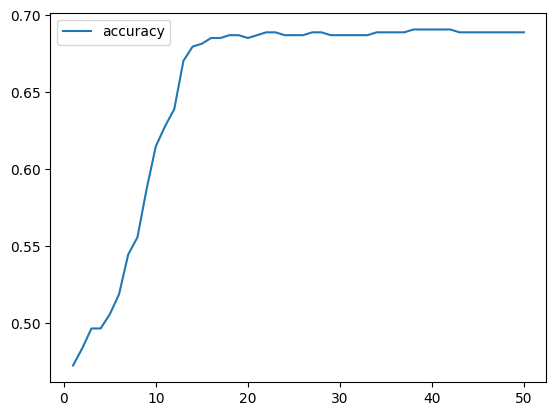

In [78]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")

Champion model

In [79]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_champion_train, epochs=50)

Epoch 1/50
17/17 [==============================] - 0s 2ms/step - loss: 0.4289 - accuracy: 0.9574
Epoch 2/50
17/17 [==============================] - 0s 2ms/step - loss: 0.3984 - accuracy: 0.9611
Epoch 3/50
17/17 [==============================] - 0s 2ms/step - loss: 0.3692 - accuracy: 0.9630
Epoch 4/50
17/17 [==============================] - 0s 2ms/step - loss: 0.3466 - accuracy: 0.9630
Epoch 5/50
17/17 [==============================] - 0s 2ms/step - loss: 0.3286 - accuracy: 0.9648
Epoch 6/50
17/17 [==============================] - 0s 2ms/step - loss: 0.3140 - accuracy: 0.9648
Epoch 7/50
17/17 [==============================] - 0s 2ms/step - loss: 0.3021 - accuracy: 0.9648
Epoch 8/50
17/17 [==============================] - 0s 3ms/step - loss: 0.2912 - accuracy: 0.9648
Epoch 9/50
17/17 [==============================] - 0s 2ms/step - loss: 0.2820 - accuracy: 0.9648
Epoch 10/50
17/17 [==============================] - 0s 2ms/step - loss: 0.2737 - accuracy: 0.9648
Epoch 11/50
17/17 [

In [80]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_champion_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - loss: 0.1593 - accuracy: 0.9722 - 34ms/epoch - 6ms/step
Loss: 0.15926240384578705, Accuracy: 0.9722222089767456


<Axes: >

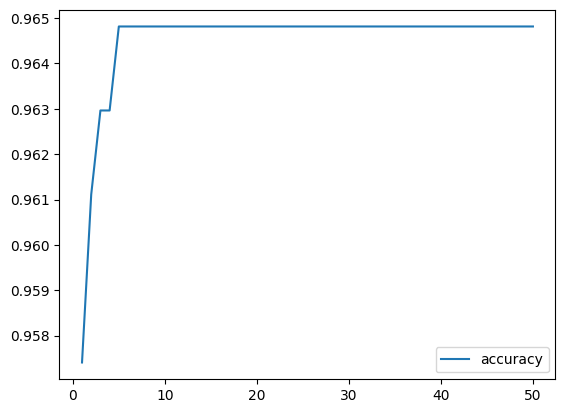

In [81]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")

SVM

In [83]:
# Create the support vector machine classifier model with a 'linear' kernel
model = SVC(kernel='linear')

In [84]:
# Fit the model to the training data
model.fit(X_train_scaled, y_playoff_train)

SVC(kernel='linear')

In [86]:
# Validate the model by checking the model accuracy with model.score
print('Train Accuracy: %.3f' % model.score(X_train_scaled, y_playoff_train))
print('Test Accuracy: %.3f' % model.score(X_test_scaled, y_playoff_test))

Train Accuracy: 0.691
Test Accuracy: 0.678


In [87]:
# Make and save testing predictions with the saved SVM model using the testing data
testing_predictions = model.predict(X_test)

# Review the predictions
testing_predictions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [89]:
# Display the accuracy score for the testing dataset
accuracy_score(y_playoff_test, testing_predictions)

0.6777777777777778

Random Forest

In [99]:
# Train the Random Forest model
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_playoff_train)

# Evaluate the model
print(f'Training Score: {clf.score(X_train_scaled, y_playoff_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_playoff_test)}')

Training Score: 1.0
Testing Score: 0.6444444444444445


In [128]:
# Evaluate the model
y_pred = clf.predict(X_test_scaled)
print("Random Forest Classifier Evaluation")
print(classification_report(y_playoff_test, y_pred))
print(confusion_matrix(y_playoff_test, y_pred))

Random Forest Classifier Evaluation
              precision    recall  f1-score   support

           0       0.68      0.89      0.77       122
           1       0.35      0.12      0.18        58

    accuracy                           0.64       180
   macro avg       0.52      0.51      0.48       180
weighted avg       0.57      0.64      0.58       180

[[109  13]
 [ 51   7]]


In [131]:
# Score the predictions with mse and r2
mse = mean_squared_error(y_playoff_test, y_pred)
r2 = r2_score(y_playoff_test, y_pred)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

mean squared error (MSE): 0.35555555555555557
R-squared (R2): -0.6280384397964949


In [106]:
# Check the model's balanced accuracy on the test set

y_test_pred = model.predict(X_test_scaled)
print(balanced_accuracy_score(y_playoff_test, y_test_pred))

0.5


In [107]:
# Check the model's balanced accuracy on the training set

y_train_pred = model.predict(X_train_scaled)
print(balanced_accuracy_score(y_playoff_train, y_train_pred))

0.5


In [100]:
# Get the feature importance array
feature_importances = clf.feature_importances_

In [101]:
# List the top 10 most important features
importances_sorted = sorted(zip(feature_importances, X.columns), reverse=True)
importances_sorted[:10]

[(0.1282884880214514, 'HR'),
 (0.1260949674348385, 'WHIP'),
 (0.12131957573611322, 'E'),
 (0.11224828610610614, 'DefEff'),
 (0.1104479650073004, 'SLG'),
 (0.10712032750446794, 'OPS'),
 (0.1009095965021495, '#Fld'),
 (0.09968212047545905, 'OPS+'),
 (0.0938886732121139, 'OBP')]

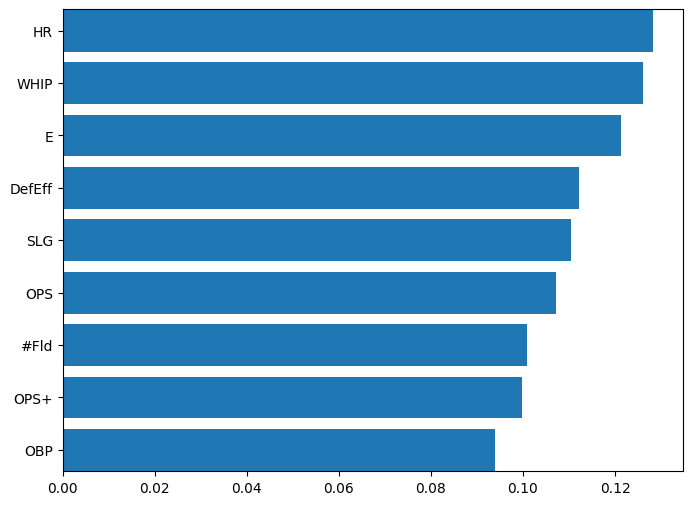

In [102]:
# Plot the feature importances
features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(8,6)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [108]:
# We overfit! Lets try varying the max depth

models = {'train_score': [], 'test_score': [], 'max_depth': []}

for depth in range(1,10):
    models['max_depth'].append(depth)
    model = RandomForestClassifier(n_estimators=500, max_depth=depth)
    model.fit(X_train_scaled, y_playoff_train)
    y_test_pred = model.predict(X_test_scaled)
    y_train_pred = model.predict(X_train_scaled)

    models['train_score'].append(balanced_accuracy_score(y_playoff_train, y_train_pred))
    models['test_score'].append(balanced_accuracy_score(y_playoff_test, y_test_pred))

models_df = pd.DataFrame(models)

<Axes: xlabel='max_depth'>

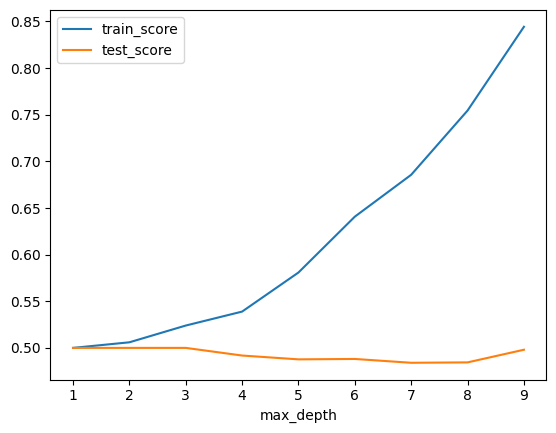

In [109]:
models_df.plot(x='max_depth')

KNN

k: 1, Train/Test Score: 1.000/0.461
k: 3, Train/Test Score: 0.789/0.528
k: 5, Train/Test Score: 0.735/0.611
k: 7, Train/Test Score: 0.735/0.639
k: 9, Train/Test Score: 0.724/0.667
k: 11, Train/Test Score: 0.719/0.650
k: 13, Train/Test Score: 0.704/0.650
k: 15, Train/Test Score: 0.693/0.644
k: 17, Train/Test Score: 0.687/0.650
k: 19, Train/Test Score: 0.694/0.672
k: 21, Train/Test Score: 0.689/0.689
k: 23, Train/Test Score: 0.691/0.683
k: 25, Train/Test Score: 0.687/0.683
k: 27, Train/Test Score: 0.689/0.683
k: 29, Train/Test Score: 0.689/0.672
k: 31, Train/Test Score: 0.689/0.678
k: 33, Train/Test Score: 0.687/0.678
k: 35, Train/Test Score: 0.689/0.678
k: 37, Train/Test Score: 0.689/0.678
k: 39, Train/Test Score: 0.689/0.678


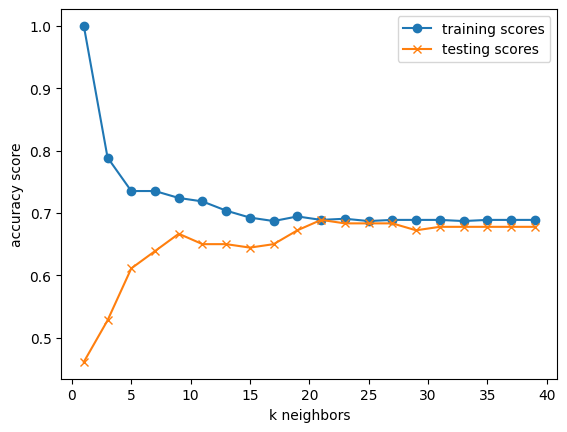

In [95]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_playoff_train)
    train_score = knn.score(X_train_scaled, y_playoff_train)
    test_score = knn.score(X_test_scaled, y_playoff_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

# Plot the results
plt.plot(range(1, 40, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 40, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [98]:
# Choose the best k, and refit the KNN classifier by using that k value.
# Note that k: 20 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_scaled, y_playoff_train)

# Print the score for the test data.
print('k=20 Test Acc: %.3f' % knn.score(X_test_scaled, y_playoff_test))

k=20 Test Acc: 0.689


PCA

In [113]:
#PCA
pca_model = PCA(n_components = 9)
pca_model.fit(X_train_scaled)

X_train_pca = pd.DataFrame(pca_model.transform(X_train_scaled))
X_test_pca = pd.DataFrame(pca_model.transform(X_test_scaled))
X_train_pca

,0,1,2,3,4,5,6,7,8
0,0.287923,-0.286906,-2.107128,-0.144493,-0.983184,0.734508,0.002480,-0.000116,0.000977
1,0.012367,-0.815194,1.221118,0.044464,0.760873,-0.347395,0.320356,0.136509,-0.000863
2,0.640672,2.162349,-1.428394,2.723721,-0.458832,-0.217554,-0.298624,0.622504,0.017500
3,-0.421916,0.313287,2.384897,0.962923,0.299528,-0.237659,-0.133728,-0.207638,-0.000899
4,1.010264,-1.269278,0.106961,0.358998,0.708000,1.058343,0.156176,0.146784,0.000528
...,...,...,...,...,...,...,...,...,...
535,-3.226281,-2.037891,0.005366,-0.577544,0.225892,0.126613,-0.722251,-0.029451,0.000464
536,-2.393687,2.259452,-1.575512,2.216707,0.650539,0.558665,1.009088,0.387163,0.001978
537,1.317168,3.665699,1.046028,-0.718760,0.430785,0.536497,-0.640946,-0.075714,0.000693
538,1.618506,0.179810,-0.790881,-0.489492,1.258080,-0.185907,-0.166693,-0.217826,0.000942


In [114]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_pca, y_playoff_train)

RandomForestClassifier()

In [115]:
y_test_pred = model.predict(X_test_pca)
print(balanced_accuracy_score(y_playoff_test, y_playoff_test))

1.0


In [117]:
models = {'train_score': [], 'test_score': [], 'max_depth': []}

for depth in range(1,10):
    models['max_depth'].append(depth)
    model = RandomForestClassifier(n_estimators=100, max_depth=depth)
    model.fit(X_train_pca, y_playoff_train)
    y_test_pred = model.predict(X_test_pca)
    y_train_pred = model.predict(X_train_pca)

    models['train_score'].append(balanced_accuracy_score(y_playoff_train, y_train_pred))
    models['test_score'].append(balanced_accuracy_score(y_playoff_test, y_test_pred))

models_df = pd.DataFrame(models)

<Axes: xlabel='max_depth'>

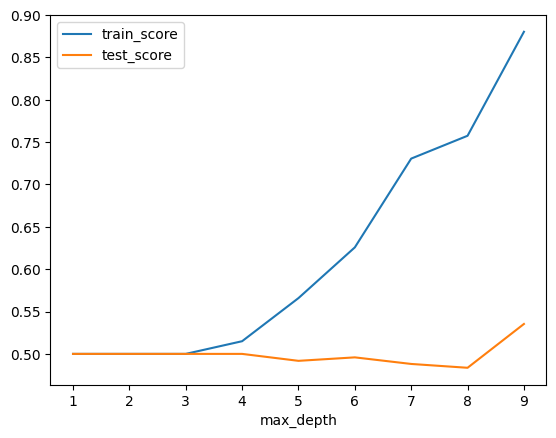

In [118]:
models_df.plot(x='max_depth')

In [119]:
models = {'train_score': [], 'test_score': [], 'n_estimators': []}

for n in [50, 100, 500, 1000]:
    models['n_estimators'].append(n)
    model = RandomForestClassifier(n_estimators=n, max_depth=7)
    model.fit(X_train_pca, y_playoff_train)
    y_test_pred = model.predict(X_test_pca)
    y_train_pred = model.predict(X_train_pca)

    models['train_score'].append(balanced_accuracy_score(y_playoff_train, y_train_pred))
    models['test_score'].append(balanced_accuracy_score(y_playoff_test, y_test_pred))

models_df = pd.DataFrame(models)

<Axes: xlabel='n_estimators'>

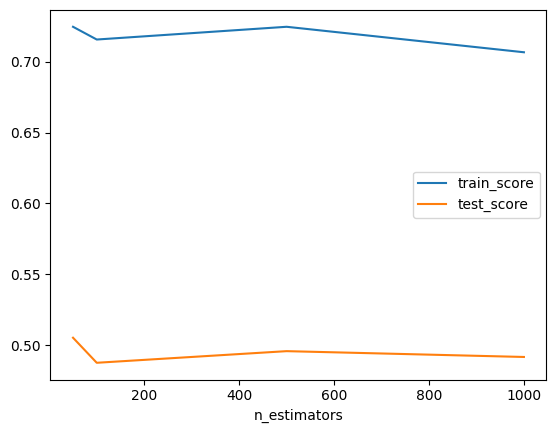

In [120]:
models_df.plot(x='n_estimators')

In [123]:
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
    'weights': ['uniform', 'distance'],
    'leaf_size': [10, 50, 100, 500]
}
random_knn = RandomizedSearchCV(KNeighborsClassifier(), param_grid, verbose=3)

random_knn.fit(X_train_pca, y_playoff_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END leaf_size=100, n_neighbors=1, weights=distance;, score=0.574 total time=   0.0s
[CV 2/5] END leaf_size=100, n_neighbors=1, weights=distance;, score=0.667 total time=   0.0s
[CV 3/5] END leaf_size=100, n_neighbors=1, weights=distance;, score=0.602 total time=   0.0s
[CV 4/5] END leaf_size=100, n_neighbors=1, weights=distance;, score=0.583 total time=   0.0s
[CV 5/5] END leaf_size=100, n_neighbors=1, weights=distance;, score=0.565 total time=   0.0s
[CV 1/5] END leaf_size=100, n_neighbors=3, weights=uniform;, score=0.648 total time=   0.0s
[CV 2/5] END leaf_size=100, n_neighbors=3, weights=uniform;, score=0.648 total time=   0.0s
[CV 3/5] END leaf_size=100, n_neighbors=3, weights=uniform;, score=0.648 total time=   0.0s
[CV 4/5] END leaf_size=100, n_neighbors=3, weights=uniform;, score=0.546 total time=   0.0s
[CV 5/5] END leaf_size=100, n_neighbors=3, weights=uniform;, score=0.611 total time=   0.0s
[CV 1/5] END l

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'leaf_size': [10, 50, 100, 500],
                                        'n_neighbors': [1, 3, 5, 7, 9, 11, 13,
                                                        15, 17, 19],
                                        'weights': ['uniform', 'distance']},
                   verbose=3)

In [124]:
y_pred = random_knn.predict(X_test_pca)
print(balanced_accuracy_score(y_playoff_test, y_pred))

0.4799321650650085


In [125]:
model = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=13)
model.fit(X_train_scaled, y_playoff_train)
y_pred = model.predict(X_test_scaled)
print(balanced_accuracy_score(y_playoff_test, y_pred))

0.4799321650650085
